In [107]:
process_pre = csvread('2018-10-28-13-21-8DataDemo.csv',1,1);
process_mid = csvread('2018-10-28-14-0-3DataDemo.csv',1,1);
process_after = csvread('2018-10-28-15-53-18DataDemo.csv',1,1);

process_10 = csvread('2018-10-28-14-44-59DataDemo_Sequence_Identy.csv',1,1);
process_20 = csvread('2018-10-28-15-58-24DataDemo_Sequence_Identy.csv',1,1);

input1 = 10 * idinput(63,'prbs');
input2 = 20 * idinput(63,'prbs');

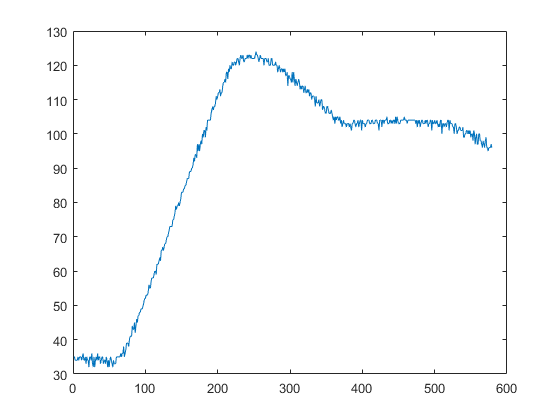

In [108]:
plot(process_pre(:,3))

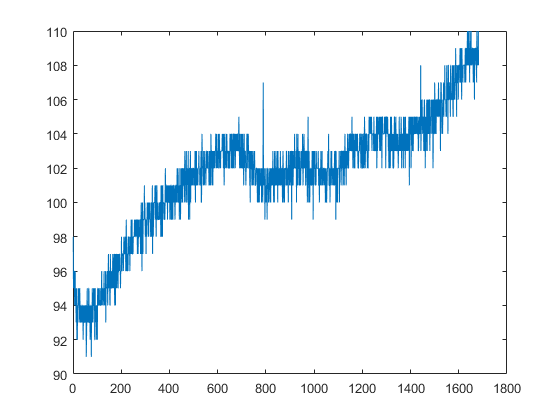

In [109]:
plot(process_mid(:,3))

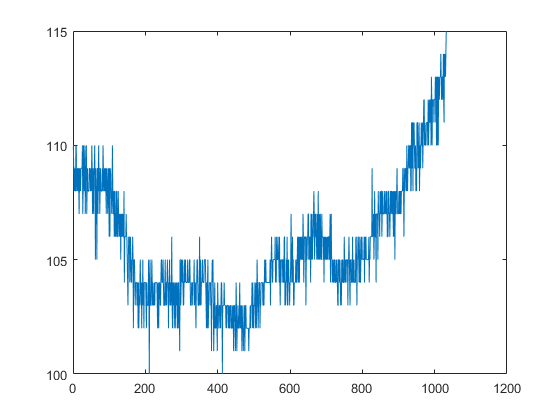

In [110]:
plot(process_after(:,3))

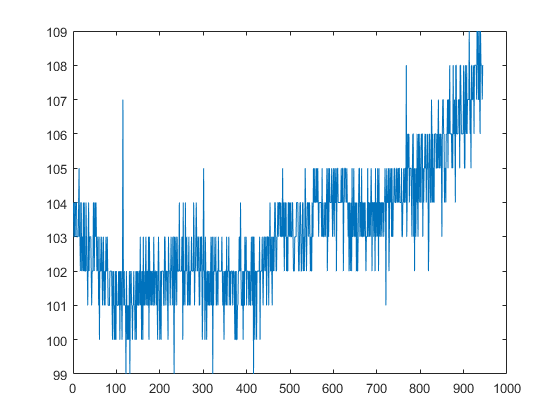

In [111]:
plot(process_10(:,3))

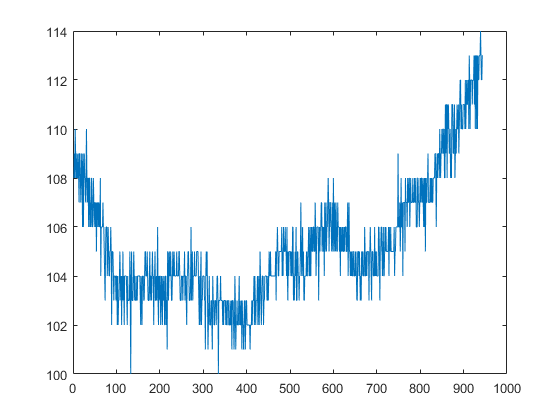

In [112]:
plot(process_20(:,3))

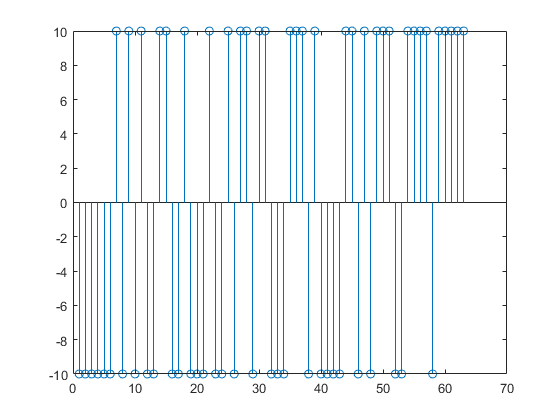

In [113]:
stem(input1)

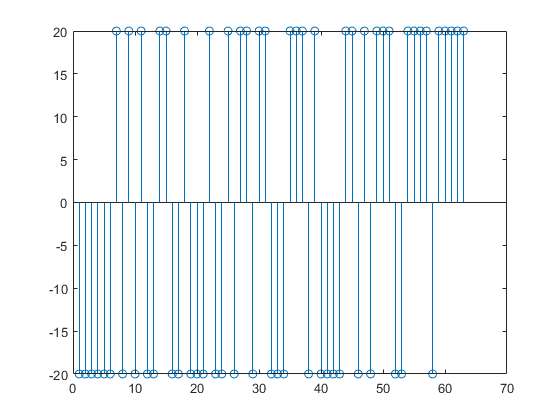

In [114]:
stem(input2)

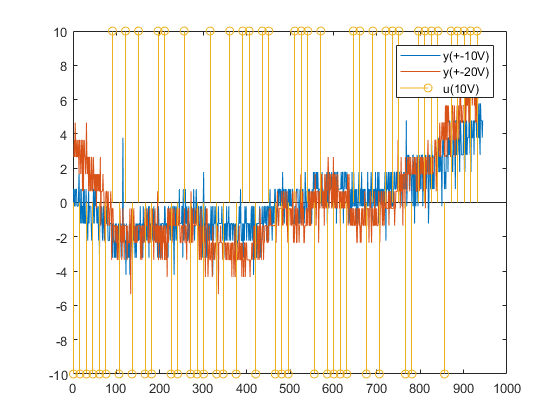

In [275]:
plot(process_10(:,3) - mean(process_10(:,3)));
hold on
plot(process_20(:,3) - mean(process_20(:,3)));
stem(1:15:15*63,input1)
hold off
legend('y(+-10V)','y(+-20V)','u(10V)')

In [ ]:
plot(process_10(1:,3) - mean(process_10(:,3)));
hold on
plot(process_20(:,3) - mean(process_20(:,3)));
stem(1:15:15*63,input1)
hold off
legend('y(+-10V)','y(+-20V)','u(10V)')

In [272]:
15*63


ans =

   945




In [269]:
size(y)
size(u)


ans =

   944     1


ans =

    63     1




In [281]:
repelem([1 2 3],3)


ans =

     1     1     1     2     2     2     3     3     3




In [293]:
rho = 0.99;
mean(process_10(:,3))
std(process_10(:,3))
mean(process_20(:,3))
std(process_20(:,3))


ans =

  103.2214


ans =

    1.8624


ans =

  105.3453


ans =

    2.5648




# 拟合

In [294]:
y = process_10(:,3) - mean(process_10(:,3));
u= repelem(input1, 15);
u = u(1:size(y,1),:);


size(u)
size(y)


ans =

   944     1


ans =

   944     1




In [299]:
clear aic_arr

for n_a = 1:5
    for n_b = 1:5
        for n_c = 1:5
            %y = data(:,1,di);
            %u = data(:,2,di);
            [theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);
            aic = get_aic(xi, n_a+n_b+n_c+1);
            aic_arr(n_a,n_b,n_c) = aic;
        end
    end
end


In [300]:
aic_arr



aic_arr(:,:,1) =

   1.0e+03 *

    1.3210    1.3216    1.3150    1.3111    1.3024
    1.3152    1.3153    1.3054    1.3079    1.2980
    1.2958    1.2952    1.2907    1.2887    1.2804
    1.2920    1.2915    1.2841    1.2836    1.2750
    1.2667    1.2657    1.2601    1.2572    1.2528


aic_arr(:,:,2) =

   1.0e+03 *

    1.3192    1.3189    1.3107    1.3089    1.2988
    1.2947    1.2933    1.2837    1.2843    1.2728
    1.2799    1.2786    1.2676    1.2678    1.2592
    1.2727    1.2707    1.2625    1.2604    1.2532
    1.2607    1.2592    1.2511    1.2492    1.2434


aic_arr(:,:,3) =

   1.0e+03 *

    1.3041    1.3029    1.2990    1.2917    1.2947
    1.2824    1.2800    1.2728    1.2724    1.2609
    1.2708    1.2681    1.2612    1.2597    1.2527
    1.2637    1.2608    1.2541    1.2525    1.2460
    1.2502    1.2485    1.2400    1.2389    1.2322


aic_arr(:,:,4) =

   1.0e+03 *

    1.3024    1.2998    1.2957    1.2915    1.2963
    1.2794    1.2767    1.2698    1.2668    1.258

In [301]:
[min_aic,min_a,min_b,min_c] = min3d(aic_arr)



min_aic =

   1.2098e+03


min_a =

     5


min_b =

     5


min_c =

     5




In [302]:
theta = rels(y,u,5,5,5,rho)



theta =

   -0.2366
   -0.1927
   -0.3200
    0.2347
   -0.5147
    0.0113
    0.0039
   -0.0494
    0.0606
   -0.0435
    0.0144
   -0.1603
   -0.3071
   -0.2541
    0.2690
   -0.4197




In [303]:
min_aic = inf;


for n_a = 1:5
    for n_b = 0:10
        for n_c = 0:5
            for d = 0:n_b
                %y = data(:,1,di);
                %u = data(:,2,di);
                [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);
                aic = get_aic(xi, n_a+n_b+n_c+1-d);
                if(aic < min_aic)
                    min_aic = aic;
                    min_a = n_a;
                    min_b = n_b;
                    min_c = n_c;
                    min_d = d;
                end
                %aic_arr(n_a,n_b,n_c,d+1) = aic;
            end
        end
    end
end


In [304]:
[min_a,min_b,min_c,min_d]


ans =

     5    10     5     0





ans =

     7   944


theta =

   -0.2833
   -0.7152
   -0.0345
    0.0673
   -0.0331
   -0.1492
   -0.7914


aic =

   1.2876e+03

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plot_trace (line 9)



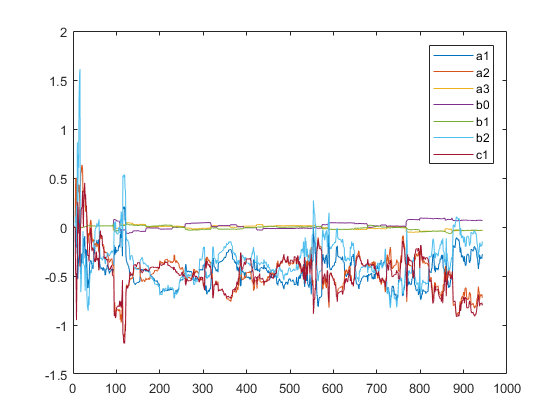

In [307]:
n_a = 2;
n_b = 4;
n_c = 2;
d = 2;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])



ans =

     3   944


theta =

   -0.9932
    0.0021
   -0.8469


aic =

   1.3222e+03

> In legend>set_children_and_strings (line 674)
  In legend>make_legend (line 346)
  In legend (line 294)
  In plot_trace (line 9)



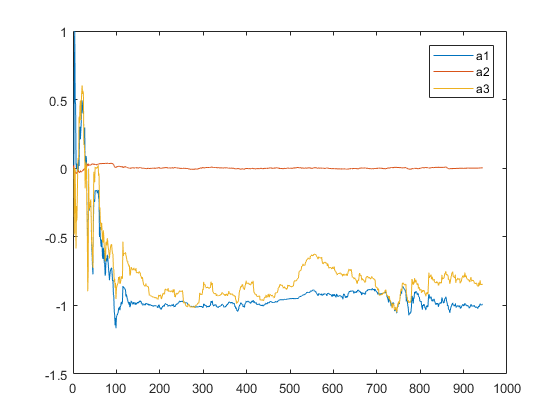

In [308]:
n_a = 1;
n_b = 1;
n_c = 1;
d = 1;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])


## 第二个序列的估计

In [309]:
y = process_20(:,3) - mean(process_20(:,3));
u= repelem(input2, 15);
u = u(1:size(y,1),:);


size(u)
size(y)


ans =

   944     1


ans =

   944     1




In [310]:
clear aic_arr
for n_a = 1:5
    for n_b = 1:5
        for n_c = 1:5
            %y = data(:,1,di);
            %u = data(:,2,di);
            [theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);
            aic = get_aic(xi, n_a+n_b+n_c+1);
            aic_arr(n_a,n_b,n_c) = aic;
        end
    end
end


In [311]:
aic_arr



aic_arr(:,:,1) =

   1.0e+03 *

    1.2842    1.2917    1.2849    1.2972    1.2957
    1.2872    1.2875    1.2855    1.2927    1.2949
    1.2729    1.2742    1.2631    1.2678    1.2712
    1.2711    1.2724    1.2633    1.2577    1.2642
    1.2536    1.2515    1.2462    1.2433    1.2378


aic_arr(:,:,2) =

   1.0e+03 *

    1.2818    1.2810    1.2769    1.2852    1.2890
    1.2535    1.2509    1.2526    1.2558    1.2575
    1.2533    1.2535    1.2425    1.2452    1.2472
    1.2469    1.2455    1.2365    1.2310    1.2327
    1.2402    1.2378    1.2334    1.2290    1.2222


aic_arr(:,:,3) =

   1.0e+03 *

    1.2810    1.2811    1.2718    1.2756    1.2787
    1.2585    1.2580    1.2486    1.2522    1.2537
    1.2420    1.2399    1.2314    1.2313    1.2359
    1.2375    1.2379    1.2266    1.2202    1.2237
    1.2296    1.2260    1.2199    1.2157    1.2076


aic_arr(:,:,4) =

   1.0e+03 *

    1.2870    1.2881    1.2778    1.2766    1.2798
    1.2591    1.2590    1.2508    1.2458    1.247

In [312]:
[min_aic,min_a,min_b,min_c] = min3d(aic_arr)



min_aic =

   1.1973e+03


min_a =

     5


min_b =

     5


min_c =

     5




In [313]:
theta = rels(y,u,5,5,5,rho)



theta =

    0.1326
   -0.3331
   -0.1109
   -0.1855
   -0.5105
    0.0038
   -0.0048
   -0.0049
    0.0142
    0.0023
   -0.0038
    0.1194
   -0.2842
   -0.0151
   -0.2225
   -0.4185




In [314]:

min_aic = inf;


for n_a = 1:5
    for n_b = 0:5
        for n_c = 0:5
            for d = 0:n_b
                [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);
                aic = get_aic(xi, n_a+n_b+n_c+1-d);
                if(aic < min_aic)
                    min_aic = aic;
                    min_a = n_a;
                    min_b = n_b;
                    min_c = n_c;
                    min_d = d;
                end
            end
        end
    end
end


In [315]:
[min_a,min_b,min_c,min_d]
min_aic


ans =

     5     5     5     0


min_aic =

   1.1973e+03





ans =

    16   944


theta =

    0.1326
   -0.3331
   -0.1109
   -0.1855
   -0.5105
    0.0038
   -0.0048
   -0.0049
    0.0142
    0.0023
   -0.0038
    0.1194
   -0.2842
   -0.0151
   -0.2225
   -0.4185


aic =

   1.1973e+03




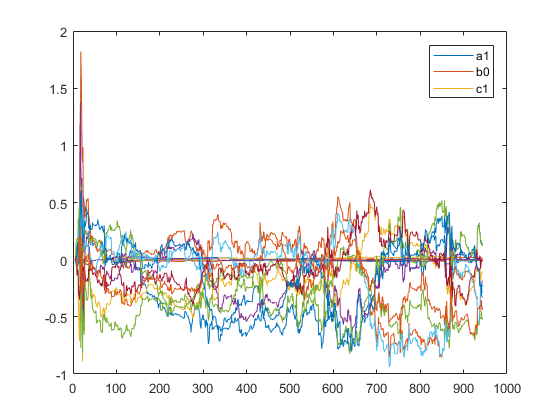

In [317]:
n_a = 5;
n_b = 5;
n_c = 5;
d = 0;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","b0","c1"])


In [318]:
size(thetas)


ans =

    16   944




In [320]:
clear error_mat;


for n = 0:5
    min_error = inf;
    for d = 0:5
        n_a = n;
        n_b = n;
        n_c = n;
        
        [theta, P, xi] = relsd(y, u, n_a, n_b+d, n_c, d, rho);
        

        
        error = sum(xi.^2);
        error_mat(n+1,d+1) = error;
    end
end


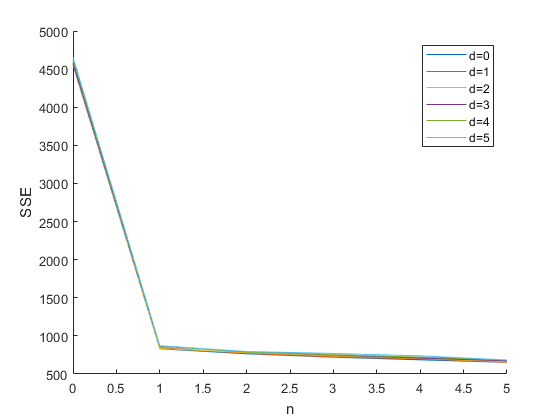

In [321]:
hold on;

for d = 1:6
    plot(0:5,error_mat(:,d));
end
hold off;
legend('d=0','d=1','d=2','d=3','d=4','d=5')
xlabel('n');
ylabel('SSE')

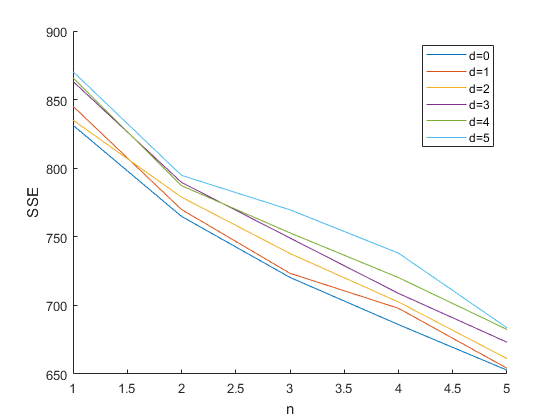

In [322]:
hold on;

for d = 1:6
    plot(1:5,error_mat(2:6,d));
end
hold off;
legend('d=0','d=1','d=2','d=3','d=4','d=5')
xlabel('n');
ylabel('SSE')

In [323]:
clear error_arr_a;
clear error_arr_b;
clear error_arr_c;
clear error_arr_d;


for n = 0:5
    n_a = n;
    n_b = min_b;
    n_c = min_c;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    error = sum(xi.^2);
    error_arr_a(n+1) = error;
end

for n = 0:5
    n_a = min_a;
    n_b = n;
    n_c = min_c;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    error = sum(xi.^2);
    error_arr_b(n+1) = error;
end

for n = 0:5
    n_a = min_a;
    n_b = min_b;
    n_c = n;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    error = sum(xi.^2);
    error_arr_c(n+1) = error;
end

for n = 0:5
    n_a = min_a;
    n_b = n;
    n_c = min_c;
    d = n;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    error = sum(xi.^2);
    error_arr_d(n+1) = error;
end


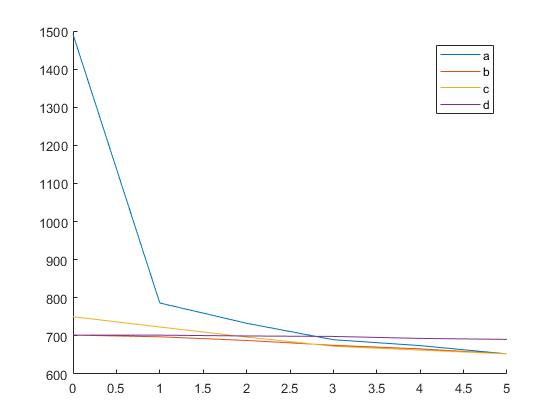

In [324]:
hold on;
plot(0:5,error_arr_a);
plot(0:5,error_arr_b);
plot(0:5,error_arr_c);
plot(0:5,error_arr_d);

hold off;
legend('a','b','c','d')

In [325]:
clear aic_arr_a;
clear aic_arr_b;
clear aic_arr_c;
clear aic_arr_d;


for n = 0:5
    n_a = n;
    n_b = min_b;
    n_c = min_c;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    aic_arr_a(n+1) = get_aic(xi, n_a+n_b+n_c+1-d);
end

for n = 1:5
    n_a = min_a;
    n_b = n;
    n_c = min_c;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    aic_arr_b(n) = get_aic(xi, n_a+n_b+n_c+1-d);
end

for n = 0:5
    n_a = min_a;
    n_b = min_b;
    n_c = n;
    d = min_d;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    aic_arr_c(n+1) = get_aic(xi, n_a+n_b+n_c+1-d);
end

for n = 0:5
    n_a = min_a;
    n_b = n;
    n_c = min_c;
    d = n;

    [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);

    aic_arr_d(n+1) = get_aic(xi, n_a+n_b+n_c+1-d);
end


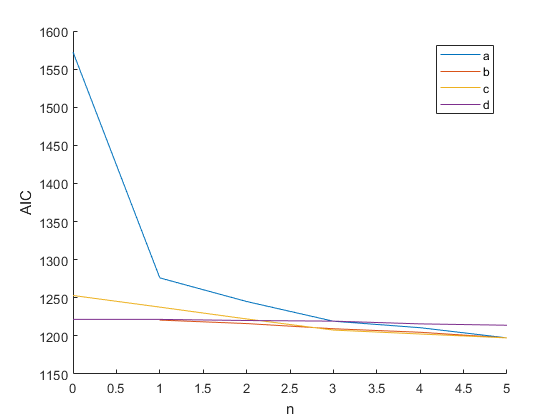

In [326]:
hold on;
plot(0:5,aic_arr_a);
plot(1:5,aic_arr_b);
plot(0:5,aic_arr_c);
plot(0:5,aic_arr_d);

hold off;
legend('a','b','c','d')
xlabel('n');
ylabel('AIC')